### 확률변수의 공분산과 상관계수

  - $Cov[X,Y] = E[(X-E[X])(Y-E[Y])]$
 
  - $\rho[X,Y] = \frac{Cov[X,Y]}{\sqrt{Var[X]\cdot Var[Y]}}$ 
  
       : 이론적인 상관계수 ( *$-1 \leq \rho \leq 1$* )
       
       - $\rho = 1$ : 완전선형 상관관계 
       - $\rho = 0$ : 무상관
       - $\rho = -1$ : 완전선형 반상관관계

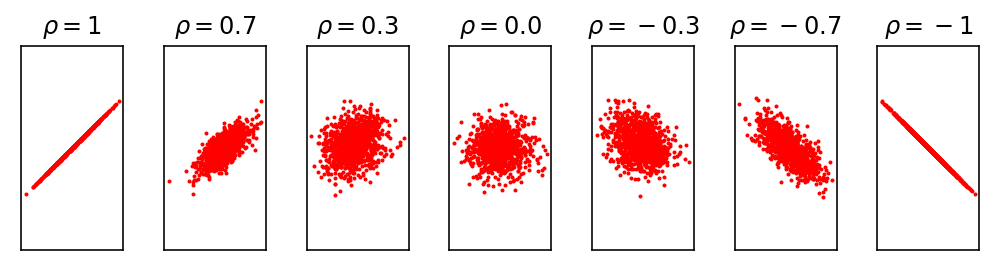

In [22]:
np.random.seed(0)

corrs = [1, 0.7, 0.3, 0., -0.3, -0.7, -1]

plt.figure(figsize=(len(corrs), 2))
for i, r in enumerate(corrs):
    x, y = np.random.multivariate_normal([0, 0], [[1, r], [r, 1]], 1000).T
    plt.subplot(1, len(corrs), i+1)
    plt.plot(x, y, 'ro', ms=1)
    plt.axis('equal')
    plt.yticks([])
    plt.xticks([])
    plt.title(r"$\rho = {}$".format(r))

plt.tight_layout()
plt.show()

#### 비선형 상관관계

 - 선형이 아닌 상관관계
 
 @@ 피어슨 상관계수는 두 확률변수의 관계가 선형적일 때만 상관관계를 제대로 계산할 수 있음

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead


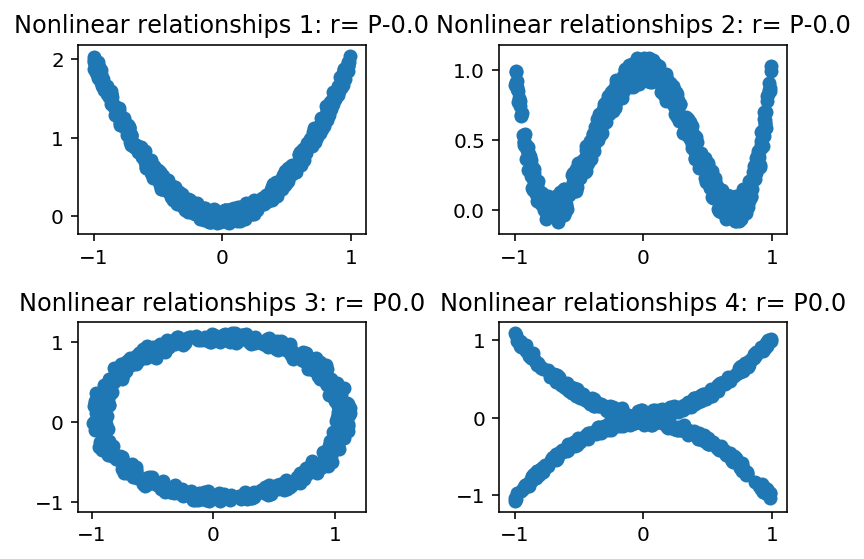

In [34]:
n = 500
np.random.seed(1)

plt.subplot(221)
x1 = np.random.uniform(-1, 1, n)
y1 = 2*x1**2 + np.random.uniform(-0.1, 0.1, n)
plt.scatter(x1, y1)
r1 = sp.stats.pearsonr(x1, y1)[0]
plt.title(r'Nonlinear relationships 1: r= P{:3.1f}'.format(r1))

plt.subplot(222)
x2 = np.random.uniform(-1, 1, n)
y2 = 4*(x2 ** 2 - 0.5)**2 + 0.1*np.random.uniform(-1, 1, n)
plt.scatter(x2, y2)
r2 = sp.stats.pearsonr(x2, y2)[0]
plt.title(r'Nonlinear relationships 2: r= P{:3.1f}'.format(r2))

plt.subplot(223)
x3 = np.random.uniform(-1, 1, n)
y3 = np.cos(x3 * np.pi) + np.random.uniform(0, 1/8, n)
x3 = np.sin(x3 * np.pi) + np.random.uniform(0, 1/8, n)
plt.scatter(x3, y3)
r3 = sp.stats.pearsonr(x3, y3)[0]
plt.title(r'Nonlinear relationships 3: r= P{:3.1f}'.format(r3))

plt.subplot(224)
x4 = np.random.uniform(-1, 1, n)
y4 = (x4 ** 2 + np.random.uniform(0, 0.1, n)) *\
    np.array([-1, 1])[np.random.random_integers(0, 1, size=n)]
plt.scatter(x4, y4)
r4 = sp.stats.pearsonr(x4, y4)[0]
plt.title(r'Nonlinear relationships 4: r= P{:3.1f}'.format(r4))
plt.tight_layout()
plt.show()

#### 앤스콤 데이터

 - 프랭크 앤스콤의 논문

In [40]:
data = sm.datasets.get_rdataset("anscombe")

df = data.data
df[["x1", "y1", "x2", "y2", "x3", "y3", "x4", "y4"]]
df

/anaconda3/lib/python3.7/site-packages/statsmodels/datasets/utils.py:192: FutureWarning: `item` has been deprecated and will be removed in a future version
  return dataset_meta["Title"].item()


,x1,x2,x3,x4,y1,y2,y3,y4
0,10,10,10,8,8.04,9.14,7.46,6.58
1,8,8,8,8,6.95,8.14,6.77,5.76
2,13,13,13,8,7.58,8.74,12.74,7.71
3,9,9,9,8,8.81,8.77,7.11,8.84
4,11,11,11,8,8.33,9.26,7.81,8.47
5,14,14,14,8,9.96,8.10,8.84,7.04
6,6,6,6,8,7.24,6.13,6.08,5.25
7,4,4,4,19,4.26,3.10,5.39,12.50
8,12,12,12,8,10.84,9.13,8.15,5.56
9,7,7,7,8,4.82,7.26,6.42,7.91


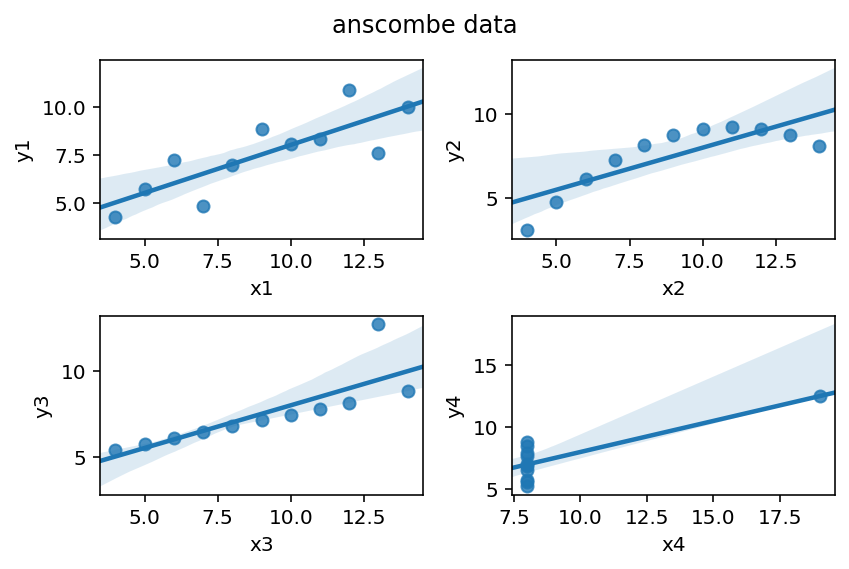

In [42]:
plt.subplot(221)
sns.regplot(x='x1', y='y1', data=df)
plt.subplot(222)
sns.regplot(x='x2', y='y2', data=df)
plt.subplot(223)
sns.regplot(x='x3', y='y3', data=df)
plt.subplot(224)
sns.regplot(x='x4', y='y4', data=df)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle("anscombe data")
plt.show()

#### 다변수 확률변수의 표본공분산

 - 공분산은 데이터 2개까지만 가능함. 
 - 다변수일 경우에는 그 중에서 2개만 골라서 사용
 
  $S = \frac{1}{N}\sum^N_{i=1}(x_i - \bar x)(x_i - \bar x)^T$
 
----
#### 다변수 확률변수의 공분산

 $Cov[X] = \Sigma$
 
 $\Sigma = E[(X-E[X])(X-E[X])^T]$
 
----